<a href="https://colab.research.google.com/github/hoangvn111/Data-Cleaning-in-Python-Advanced/blob/master/Data_Cleaning_in_Python_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction

The dataset we will be working with is based off this CSV of Hacker News stories from September 2015 to September 2016. The columns in the dataset are explained below:

* id: The unique identifier from Hacker News for the story
* title: The title of the story
* url: The URL that the stories links to, if the story has a URL
* num_points: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: The number of comments that were made on the story
* author: The username of the person who submitted the story
* created_at: The date and time at which the story was submitted

In [2]:
import pandas as pd 
hn = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning in Python Advanced/hacker_news.csv')

In [3]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [4]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20099 non-null  int64 
 1   title         20099 non-null  object
 2   url           17659 non-null  object
 3   num_points    20099 non-null  int64 
 4   num_comments  20099 non-null  int64 
 5   author        20099 non-null  object
 6   created_at    20099 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


## Regular Expression Basics

### The Regular Expression Module

We're going to use this technique to find out how many times Python is mentioned in the title of stories in our Hacker News dataset. We'll use a set to check for both Python with a capital 'P' and python with a lowercase 'p'.

In [5]:
# import module re
import re 

# extract a list 'titles' containing all the titles from dataset
titles = hn['title'].tolist()

python_mentions = 0

pattern = '[Pp]ython'

for title in titles:
    if re.search(pattern, title):
        python_mentions += 1

print(python_mentions)

160


### Counting Matches with pandas Methods

In [6]:
titles = hn['title']
pattern = '[Pp]ython'

python_mentions = titles.str.contains(pattern).sum()

print(python_mentions)

160


### Using Regular Expressions to Select Data

In [7]:
titles = hn['title']

ruby_titles = titles[titles.str.contains('[Rr]uby')]

print(ruby_titles.head())

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object


### Quantifiers

In [8]:
pattern = 'e-?mail'
email_bool = titles.str.contains(pattern)
email_count = email_bool.sum()
email_titles = titles[email_bool]

print(email_count)
print('\n')
print(email_titles.head())

86


119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object


### Character Classes 

In [9]:
pattern = '\[\w+\]'
tag_titles = titles[titles.str.contains(pattern)]
tag_count = titles.str.contains(pattern).sum()

print(tag_count)
print('\n')
print(tag_titles.head())


444


66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object


### Accessing the Matching Text with Capture Groups 

In [10]:
pattern = r'\[(\w+)\]'

tag_titles = titles.str.extract(pattern, expand=False)
tag_freq = tag_titles.value_counts(dropna=False)

print(tag_freq)
print('\n')
print(tag_titles.head())

NaN            19655
pdf              276
video            111
audio              3
2015               3
slides             2
beta               2
2014               2
ANNOUNCE           1
JavaScript         1
USA                1
Live               1
Australian         1
GOST               1
Petition           1
comic              1
crash              1
Beta               1
blank              1
Infograph          1
Map                1
Excerpt            1
Skinnywhale        1
detainee           1
German             1
map                1
CSS                1
Python             1
repost             1
SPA                1
updated            1
SpaceX             1
much               1
satire             1
Benchmark          1
5                  1
React              1
png                1
coffee             1
Videos             1
1996               1
NSFW               1
song               1
Ubuntu             1
2008               1
HBR                1
videos             1
ask          

### Negative Character Classes 

We can see that there are a number of matches that contain Java as part of the word JavaScript. We want to exclude these titles from matching so we get an accurate count.

Let's use the negative set [^Ss] to exclude instances like JavaScript and Javascript:

In [11]:
pattern = r'[Jj]ava[^Ss]'

java_titles = titles[titles.str.contains(pattern)]

print(java_titles.head())

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object


### Word Boundaries 

While the negative set was effective in removing any bad matches that mention JavaScript, it also had the side-effect of removing any titles where Java occurs at the end of the string, like this title:

Pippo  Web framework in Java

In [12]:
pattern = r'\b[Jj]ava\b'

java_titles = titles[titles.str.contains(pattern)]

print(java_titles.head())

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object


### Matching at the Start and End of Strings

In [13]:
pattern_beginning = r"^\[\w+\]"
beginning_count = titles.str.contains(pattern_beginning).sum()

pattern_ending =  r"\[\w+\]$"
ending_count = titles.str.contains(pattern_ending).sum()

print(beginning_count)
print('\n')
print(ending_count)

15


417


### Challenge: Using Flags to Modify Regex Pattern

we can use **flags** to specify that our regular expression should ignore case

In [14]:
import re

email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])

pattern = r'\be[\-\s]?mails?\b'

email_mentions = email_tests[email_tests.str.contains(pattern, flags=re.I)]

print(email_mentions)

0       email
1       Email
2      e Mail
3      e mail
4      E-mail
5      e-mail
6       eMail
7      E-Mail
8       EMAIL
9      emails
10     Emails
11    E-Mails
dtype: object


## Advanced Regular Expression

### Introduction

In [15]:
pattern = r'sql'

sql_counts = titles.str.contains(pattern, flags=re.I).sum()

print(sql_counts)

108


In [16]:
titles[titles.str.contains(pattern, flags=re.I)].head(20)

9       Crate raises $4M seed round for its next-gen S...
142                  PostgreSQL: Linux VS Windows  part 2
221                  MemSQL (YC W11) Raises $36M Series C
394                          The History of SQL Injection
419     Pentesterlab Tutorial  SQL injection to web ad...
513                         Crab  SQL for your filesystem
683                     SQLite: The art of keep it simple
882            Pgmemcahe :A PostgreSQL memcache functions
1160    How to choose an in-memory NoSQL solution: Per...
1164    Show HN: Migrate  Sane database/sql migrations...
1197    Postgraphql: A GraphQL schema created by refle...
1327                             Outlier Detection in SQL
1370    MI6 (SIS) Is Developing a Node.js, Angular, No...
1612                          Appropriate Uses for SQLite
1960    Microsoft SQL Server Images Available on Googl...
2430       Tracker: Ingesting MySQL data at scale  Part 2
2432               SQL for NoSQL: Couchbase N1QL Tutorial
2543          

In [17]:
# find only SQL not include SQLlite, PostgreSQL, NoSQL, ...
titles[titles.str.contains(r'\bsql\b', flags=re.I)] 

9        Crate raises $4M seed round for its next-gen S...
394                           The History of SQL Injection
419      Pentesterlab Tutorial  SQL injection to web ad...
513                          Crab  SQL for your filesystem
1164     Show HN: Migrate  Sane database/sql migrations...
1327                              Outlier Detection in SQL
1960     Microsoft SQL Server Images Available on Googl...
2432                SQL for NoSQL: Couchbase N1QL Tutorial
2543                   PacketQ: SQL queries for pcap files
2648       Hacking Microsoft SQL Server Without a Password
3348     Show HN: Embed a Search-box that converts plai...
4944     SQL vs. NoSQL: you do want to have a relationa...
5021     Microsoft SQL Server Developer Edition Is Now ...
5112     Microsoft Azure SQL Database provides unparall...
5654     Independent SQL-On-Hadoop Benchmark of SparkSQ...
5726     Show HN: SQL Back End for the Static Web and M...
5844     Node-Data is unique framework to support sql,n.

### Capture Groups 

In [18]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql['flavor'] = hn_sql['title'].str.extract(r'(\w+SQL)', flags=re.I, expand=False)
hn_sql['flavor'].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
nosql          1
MemSQL         1
SparkSQL       1
mySql          1
CloudSQL       1
Name: flavor, dtype: int64

In [19]:
# duplication due to varied capitalization in this frequency table:
# NoSQL and nosql
# MySQL and mysql

# change all to lowercase
hn_sql['flavor'] = hn_sql['flavor'].str.lower()
hn_sql['flavor'].value_counts()

postgresql    27
nosql         17
mysql         13
cloudsql       1
memsql         1
sparksql       1
Name: flavor, dtype: int64

In [20]:
sql_pivot = hn_sql.pivot_table(values='num_comments', index='flavor')
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


### Using Capture Groups to Extract Data

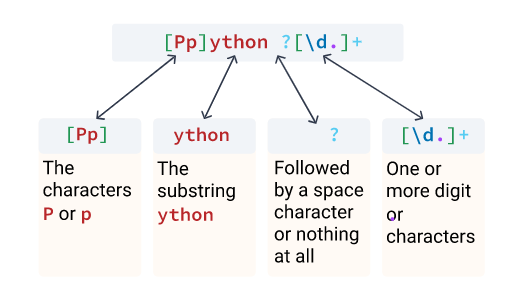

In [21]:
titles

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3        Note by Note: The Making of Steinway L1037 (2007)
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

We'll use a capture group to capture the version number after the word "Python," and then build a frequency table of the different versions.

In [22]:
pattern = r'[Pp]ython ([\d.]+)'
py_versions_freq = dict(titles.str.extract(pattern, expand=False).value_counts())
py_versions_freq

{'1.5': 1,
 '2': 3,
 '2.7': 1,
 '3': 10,
 '3.5': 3,
 '3.5.0': 1,
 '3.6': 2,
 '4': 1,
 '8': 1}

### Counting Mentions of the 'C' Language

We'll counting the mentions of the C language.

In [23]:
pattern = r'\b[Cc]\b'

c = titles[titles.str.contains(pattern)]
c

13                  Custom Deleters for C++ Smart Pointers
220                         Lisp, C++: Sadness in my heart
221                   MemSQL (YC W11) Raises $36M Series C
353      VW C.E.O. Personally Apologized to President O...
365                       The new C standards are worth it
                               ...                        
19667                         Ill-Advised C++ Rant, Part 2
19799    Introducing a new, advanced Visual C++ code op...
19829    Ferret: Compiling a Subset of Clojure to ISO C...
19933    Lightweight C library to parse NMEA 0183 sente...
19997                                    Proposal: C.UTF-8
Name: title, Length: 190, dtype: object

Immediately, our results are reasonably relevant. However, we can quickly identify a few match types we want to prevent:

* Mentions of C++, a distinct language from C.
* Cases where the letter C is followed by a period, like in the substring C.E.O.

Let's use a negative set to prevent matches for the + character and the . character.

In [24]:
pattern = r'\b[Cc]\b[^.+]'

c_mentions = titles[titles.str.contains(pattern)]
c_mentions

365                       The new C standards are worth it
444            Moz raises $10m Series C from Foundry Group
521           Fuchsia: Micro kernel written in C by Google
1307             Show HN: Yupp, yet another C preprocessor
1326                      The C standard formalized in Coq
                               ...                        
18543                 C-style for loops removed from Swift
18549            Show HN: An awesome C library for Windows
18649                 Python vs. C/C++ in embedded systems
19151                      Ask HN: How to learn C in 2016?
19933    Lightweight C library to parse NMEA 0183 sente...
Name: title, Length: 84, dtype: object

### Using Lookarounds to Control Matches Based on Surrounding Text

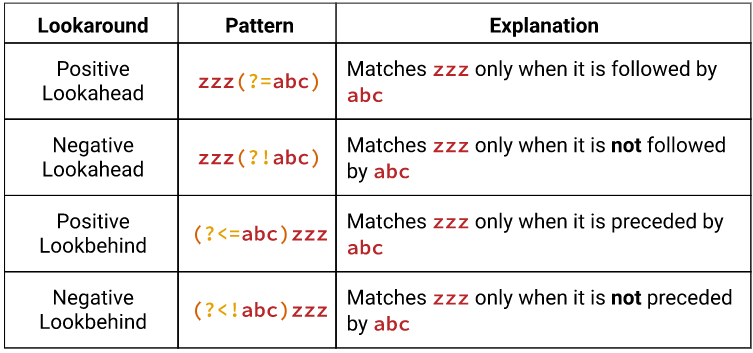

* Keep excluding matches that are followed by . or +, but still match cases where "C" falls at the end of the sentence.
* Exclude matches that have the word 'Series' immediately preceding them.

In [25]:
pattern = r"(?<!Series\s)\b[Cc]\b((?![.+])|\.$)"
c_mentions = titles[titles.str.contains(pattern)]
c_mentions

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


365                       The new C standards are worth it
521           Fuchsia: Micro kernel written in C by Google
1307             Show HN: Yupp, yet another C preprocessor
1326                      The C standard formalized in Coq
1365                           GNU C Library 2.23 released
                               ...                        
18543                 C-style for loops removed from Swift
18549            Show HN: An awesome C library for Windows
18649                 Python vs. C/C++ in embedded systems
19151                      Ask HN: How to learn C in 2016?
19933    Lightweight C library to parse NMEA 0183 sente...
Name: title, Length: 102, dtype: object

### Backreferences: Using Capture Groups in a RegEx Pattern

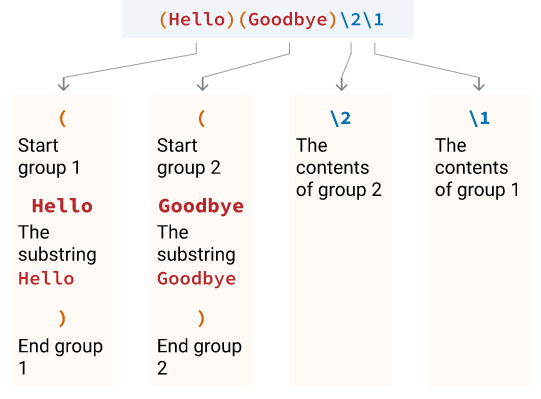

The regular expression above will match the text **HelloGoodbyeGoodbyeHello**.

Write a regular expression to match cases of repeated words:

* We'll define a word as a series of one or more word characters preceded and followed by a boundary anchor.
* We'll define repeated words as the same word repeated twice, separated by a single whitespace character.

In [26]:
pattern = r'\b(\w+)(\s)\1\b'
repeated_words = titles[titles.str.contains(pattern)]

repeated_words

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

### Substituting Regular Expression Mathces

Series.str.replace() method and a regular expression

Use a regular expression to replace each of the matches in email_variations with "email"

In [27]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])

pattern = r'\be[-\s]?mail'

titles_clean = titles.str.replace(pattern, 'email', flags=re.I)

titles_clean

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3        Note by Note: The Making of Steinway L1037 (2007)
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

### Extracting Domains from URLs

Extract domains form URLs

In [28]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

pattern = r'https?://([\w\-\.]+)'

test_urls_clean = test_urls.str.extract(pattern, expand=False, flags=re.I)

domains = hn['url'].str.extract(pattern, expand=False, flags=re.I)

top_domains = domains.value_counts().head(5)

top_domains

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: url, dtype: int64

### Using URL Parts Using Multiple Capture Groups

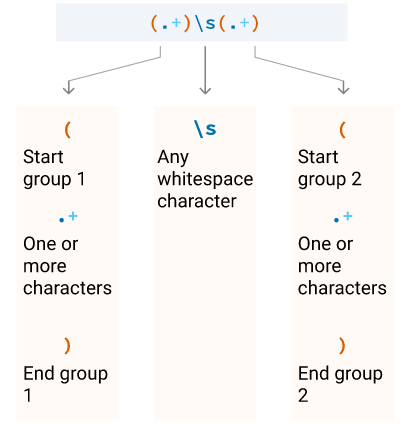

In [29]:
pattern = r"(.+)\s(.+)"

created_at = hn['created_at']
dates_times = created_at.str.extract(pattern)

print(dates_times)

                0      1
0        8/4/2016  11:52
1       6/23/2016  22:20
2       6/17/2016   0:01
3       9/30/2015   4:12
4      10/31/2015   9:48
...           ...    ...
20094   8/29/2016   2:22
20095   10/6/2015  14:57
20096    1/2/2016   0:49
20097  12/15/2015  19:32
20098   5/12/2016   1:43

[20099 rows x 2 columns]


We'll extract each of the three component parts of the URLs:

1. Protocol
2. Domain
3. Page path

In [30]:
pattern = r"(https?)://([\w\.\-]+)/?(.*)"
test_url_parts = test_urls.str.extract(pattern, flags=re.I)

url_parts = hn['url'].str.extract(pattern, flags=re.I)

url_parts

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


### Using Named Capture Groups to Extract Data

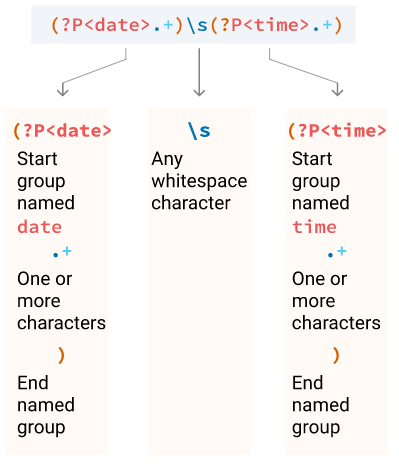

In [31]:
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"

url_parts = hn['url'].str.extract(pattern, flags=re.I)

url_parts

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


In [32]:
import csv 

f = open('/content/drive/MyDrive/my_datasets/Data Cleaning in Python Advanced/hacker_news.csv')
reader = csv.reader(f)
for row in reader:
    print(row[1])

Streaming output truncated to the last 5000 lines.
Running a Deep Learning (Dream) Machine, Part II
How Finland's Basic Income Experiment Will Work
At the Modules of Madness
Lessons Learned After Shutting My Startup, Following a Six-Year Struggle
The Zappos Exodus Continues After a Radical Management Experiment
Theranos CEO Elizabeth Holmes Replies to WSJ Allegations on CNBC
Verizon Workers Strike on East Coast After Deadline Passes
Why cyclists should be able to roll through stop signs, ride through red lights
Movement-Based Behaviors and Leukocyte Telomere Length Among US Adults (study)
Sony agrees to pay millions to gamers to settle PS3 Linux debacle
Phoenix Channels vs. Rails Action Cable
No Sane Compiler Would Optimize Atomics
Stanford quantifies the privacy-stripping power of metadata
Chinese satellite is one giant step for the quantum internet
New Bing app for iOS rocks
Accessing RAM sometimes costs extra log(N)
License Plate Readers Exposed  How Public Safety Agencies Responded

## List Comprehensions and Lambda Functions

### JSON Format

The Python json module contains a number of functions to make working with JSON objects easier. We can use the json.loads() method to convert JSON data contained in a string to the equivalent set of Python objects

In [33]:
import json 


world_cup_str = """
[
    {
        "team_1": "France",
        "team_2": "Croatia",
        "game_type": "Final",
        "score" : [4, 2]
    },
    {
        "team_1": "Belgium",
        "team_2": "England",
        "game_type": "3rd/4th Playoff",
        "score" : [2, 0]
    }
]
"""

world_cup_obj = json.loads(world_cup_str)
type(world_cup_obj)

list

### Reading Json File

To read a file from JSON format, we use the json.load() function

In [34]:
import json 

open_file = open('/content/drive/MyDrive/my_datasets/Data Cleaning in Python Advanced/hn_2014.json')
hn = json.load(open_file)

In [35]:
print(len(hn))
print(type(hn[0]))

35806
<class 'dict'>


Our hn variable is a list.

Our data set contains 35,806 dictionary objects, each representing a Hacker News story

In [36]:
# print the keys of the frist dictionary

print(hn[0].keys())

dict_keys(['author', 'numComments', 'points', 'url', 'storyText', 'createdAt', 'tags', 'createdAtI', 'title', 'objectId'])


* author: The username of the person who submitted the story.
* createdAt: The date and time at which the story was created.
* createdAtI: An integer value representing the date and time at which the story was created.
* numComments: The number of comments that were made on the story.
* objectId: The unique identifier from Hacker News for the story.
* points: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes.
* storyText: The text of the story (if the story contains text).
* tags: A list of tags associated with the story.
* title: The title of the story.
* url: The URL that the story links to (if the story links to a URL).

The json.dumps() function accepts arguments that can specify formatting for the string, which we'll use to make things easier to read

### Deleting Dictionary Keys

The json.dumps() function accepts arguments that can specify formatting for the string, which we'll use to make things easier to read:

In [37]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

first_story = hn[0]
jprint(first_story)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


You may notice that the **createdAt** and **createdAtI** keys both have the date and time data in two different formats. Because the format of createdAt is much easier to understand, let's do some data cleaning by deleting the createdAtI key from every dictionary.

To delete a key from a dictionary, we can use the del statement.

In [38]:
def del_key(dict_, key):
    # create a copy so we don't
    # modify the original dict
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict

In [39]:
# first_story = del_key(first_story, 'createdAtI')
# first_story

In [40]:
# jprint(first_story)

In [41]:
hn_clean = []

for story in hn:
    story = del_key(story, 'createdAtI')
    hn_clean.append(story)


In [42]:
text = json.dumps(hn_clean[0], indent=4 , sort_keys=True)
print(text)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


### Writing List Comprehensions

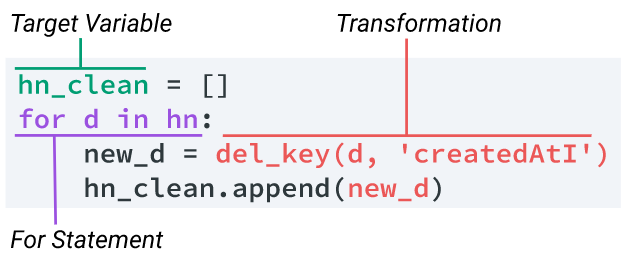

In [43]:
hn_clean = [del_key(d, 'createdAtI') for d in hn ]

hn_clean[0]

{'author': 'dragongraphics',
 'createdAt': '2014-05-29T08:07:50Z',
 'numComments': 0,
 'objectId': '7815238',
 'points': 2,
 'storyText': '',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy'}

### Using List Comprehensions to Transform and Create Lists

Use a list comprehension to extract the **url** value from each dictionary in hn_clean. Assign the result to urls.

In [44]:
urls = [hn['url'] for hn in hn_clean]
urls[:3]

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971']

### Using List Comprehensions to Reduce a List 

Let's use list comprehension to count how many stories have more than 1,000 points.

In [45]:
thousand_points = [hn for hn in hn_clean if hn['points'] > 1000]

num_thousand_points = len(thousand_points)

text = json.dumps(thousand_points, indent=4, sort_keys=True)
print(text)
print('\n')
print(num_thousand_points)

[
    {
        "author": "keithwarren",
        "createdAt": "2014-04-03T16:48:14Z",
        "numComments": 451,
        "objectId": "7524082",
        "points": 1297,
        "storyText": "",
        "tags": [
            "story",
            "author_keithwarren",
            "story_7524082"
        ],
        "title": "Microsoft Open Sources C# Compiler",
        "url": "http://roslyn.codeplex.com/"
    },
    {
        "author": "zipop",
        "createdAt": "2014-03-14T19:05:37Z",
        "numComments": 403,
        "objectId": "7401029",
        "points": 1192,
        "storyText": "",
        "tags": [
            "story",
            "author_zipop",
            "story_7401029"
        ],
        "title": "Elon Musk: To the People of New Jersey",
        "url": "http://www.teslamotors.com/blog/people-new-jersey"
    },
    {
        "author": "frederfred",
        "createdAt": "2014-03-10T15:44:42Z",
        "numComments": 398,
        "objectId": "7373566",
        "points": 27

### Passing Functions as Arguments

Find the story that has the greatest number of comments.

In [46]:
def get_comments(hn_clean):
    return hn_clean['numComments']

most_comments = max(hn_clean, key=get_comments)
most_comments

{'author': 'platz',
 'createdAt': '2014-04-03T19:02:53Z',
 'numComments': 1208,
 'objectId': '7525198',
 'points': 889,
 'storyText': None,
 'tags': ['story', 'author_platz', 'story_7525198'],
 'title': 'Brendan Eich Steps Down as Mozilla CEO',
 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/'}

### Lambda Functions

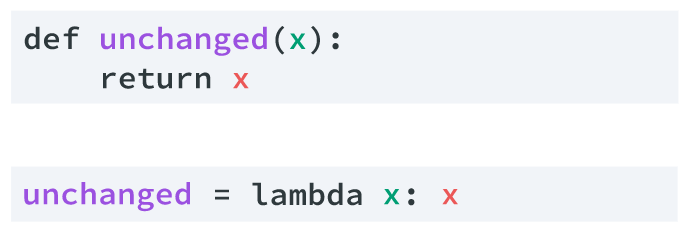

In [47]:
# def multiply(a, b):
#    return a * b

multiply = lambda a, b : a * b 

### Using Lambda Functions to Analyze JSON data

list by the number of points (dictionary key points) from highest to lowest:

In [48]:
hn_sorted_points = sorted(hn_clean, key= lambda hn_clean: hn_clean['points'], reverse = True)
print(json.dumps(hn_sorted_points[:1], indent=4, sort_keys=True))

[
    {
        "author": "frederfred",
        "createdAt": "2014-03-10T15:44:42Z",
        "numComments": 398,
        "objectId": "7373566",
        "points": 2732,
        "storyText": "",
        "tags": [
            "story",
            "author_frederfred",
            "story_7373566"
        ],
        "title": "2048",
        "url": "http://gabrielecirulli.github.io/2048/"
    }
]


Use a list comprehension to return a list of the five post titles (dictionary key title) that have the most points in our data set:

In [49]:
top_5_titles = [story['title'] for story in hn_sorted_points[:5]]

print(json.dumps(top_5_titles, indent=4, sort_keys=True))

[
    "2048",
    "Today is The Day We Fight Back",
    "Wozniak: \u201cActually, the movie was largely a lie about me\u201d",
    "Microsoft Open Sources C# Compiler",
    "Elon Musk: To the People of New Jersey"
]


### Reading JSON files into pandas 

we've worked with our JSON data using pure Python. One other option available to us is to convert the JSON to a pandas dataframe and then use pandas methods to manipulate it.

We can use the pandas.DataFrame() constructor and pass the list of dictionaries directly to it to convert the JSON to a dataframe:

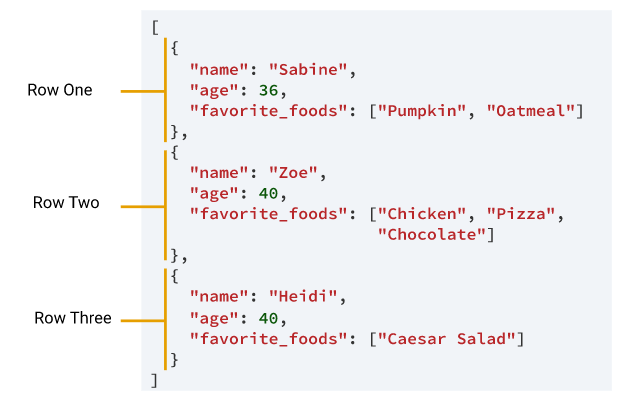

In [50]:
import pandas as pd 

hn_df = pd.DataFrame(hn_clean)

hn_df[:5]


,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,"[story, author_jcr, story_7815234]",Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,"[story, author_callum85, story_7815230]",Apple Agrees to Buy Beats for $3 Billion,7815230
3,d3v3r0,0,1,http://alexsblog.org/2014/05/29/dont-wait-for-...,,2014-05-29T08:00:08Z,"[story, author_d3v3r0, story_7815222]",Don’t wait for inspiration,7815222
4,timmipetit,0,1,http://techcrunch.com/2014/05/28/hackerone-get...,,2014-05-29T07:46:19Z,"[story, author_timmipetit, story_7815191]",HackerOne Get $9M In Series A Funding To Build...,7815191


### Exploring Tags Using the Apply Function

In [51]:
tags = hn_df['tags']
tags_types = tags.apply(type)
tags_types = tags.apply(len)
type_lengths = tags_types.value_counts(dropna=False)
print(type_lengths)

3    33459
4     2347
Name: tags, dtype: int64


While most of the item have three values in the list, about 2,000 values contain four values. Let's use a boolean mask to look at the items where the list has four items:

In [52]:
four_tags = tags[tags.apply(len) == 4]
len(four_tags)

2347

### Extracting Tags Using Apply with a Lambda Function

In [53]:
print(four_tags.head())

43     [story, author_alamgir_mand, story_7813869, sh...
86       [story, author_cweagans, story_7812404, ask_hn]
104    [story, author_nightstrike789, story_7812099, ...
107    [story, author_ISeemToBeAVerb, story_7812048, ...
109       [story, author_Swizec, story_7812018, show_hn]
Name: tags, dtype: object


It looks like whenever there are four tags, the extra tag is the last of the four. In this final exercise of the mission, we're going to use a lambda function to extract this fourth value in cases where there is one

**ternary operator** ( toán tử 3 ngôi )


[on_true] **if** [expression] **else** [on_false]

In [54]:
# Using series.apply() and lambda function to extract the tag data from tags:
cleaned_tags = tags.apply(lambda tag: tag[-1] if len(tag) == 4 else None)
cleaned_tags.value_counts(dropna=False)

NaN        33459
ask_hn      1348
show_hn      999
Name: tags, dtype: int64

In [55]:
hn_df['tags'] = cleaned_tags
print(hn_df['tags'].value_counts(dropna=False))

NaN        33459
ask_hn      1348
show_hn      999
Name: tags, dtype: int64


## Working with Missing Data

### Introduction 

In this mission, we'll learn how to handle missing data without having to drop rows and columns

In [56]:
import pandas as pd

mvc = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning in Python Advanced/nypd_mvc_2018.csv')

Exploring the data

In [57]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [58]:
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_key           57864 non-null  int64  
 1   date                 57864 non-null  object 
 2   time                 57864 non-null  object 
 3   borough              37218 non-null  object 
 4   location             53979 non-null  object 
 5   on_street            43903 non-null  object 
 6   cross_street         28615 non-null  object 
 7   off_street           13771 non-null  object 
 8   pedestrians_injured  57864 non-null  int64  
 9   cyclist_injured      57864 non-null  int64  
 10  motorist_injured     57864 non-null  int64  
 11  total_injured        57863 non-null  float64
 12  pedestrians_killed   57864 non-null  int64  
 13  cyclist_killed       57864 non-null  int64  
 14  motorist_killed      57864 non-null  int64  
 15  total_killed         57859 non-null 

A summary of the columns and their data is below:

* unique_key: A unique identifier for each collision.
* date, time: Date and time of the collision.
* borough: The borough, or area of New York City, where the collision occurred.
* location: Latitude and longitude coordinates for the collision.
* on_street, cross_street, off_street: Details of the street or intersection where the collision occurred.
* pedestrians_injured: Number of pedestrians who were injured.
* cyclist_injured: Number of people traveling on a bicycle who were injured.
* motorist_injured: Number of people traveling in a vehicle who were injured.
* total_injured: Total number of people injured.
* pedestrians_killed: Number of pedestrians who were killed.
* cyclist_killed: Number of people traveling on a bicycle who were killed.
* motorist_killed: Number of people traveling in a vehicle who were killed.
* total_killed: Total number of people killed.
* vehicle_1 through vehicle_5: Type of each vehicle involved in the accident.
* cause_vehicle_1 through cause_vehicle_5: Contributing factor for each vehicle in the accident.

In [59]:
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

### Verifying the Total Columns 



Calculate the percentage of null values in each column

In [60]:
mvc.shape

(57864, 26)

In [61]:
null_counts_pct = null_counts / mvc.shape[0] * 100

null_counts_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

In [62]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct}, dtype=int)
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)

# null_df = null_df.transform()
# null_df = null_df.astype(int)

null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,0,1,0,0,0,5,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,0,0,0,0,0,0,0,21,93,98,99,0,15,93,98,99


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%!

To make things easier, let's start by looking at the group of columns that relate to people killed in collisions.

In [63]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


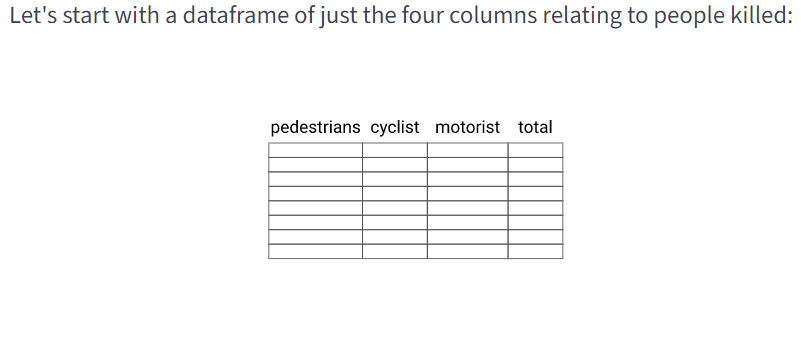

In [64]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

killed

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
57859,0,0,0,0.0
57860,0,0,0,0.0
57861,0,0,0,0.0
57862,0,0,0,0.0


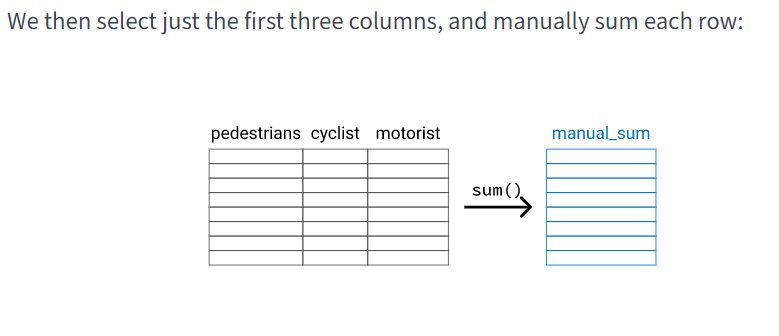

In [65]:
# Select the first three columns from killed and sum each row. Assign the result to killed_manual_sum.
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)

killed_manual_sum

0        0
1        0
2        0
3        0
4        0
        ..
57859    0
57860    0
57861    0
57862    0
57863    0
Length: 57864, dtype: int64

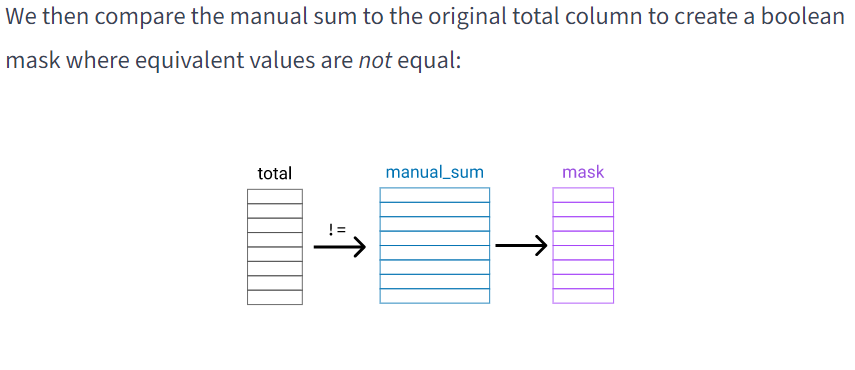

In [66]:
# Create a boolean mask that checks whether each value in killed_manual_sum is not equal to the values in the total_killed column. Assign the boolean mask to killed_mask.
killed_mask = killed_manual_sum != mvc['total_killed']
print(killed_mask.value_counts())
print('\n')
killed_mask

False    57858
True         6
dtype: int64




0        False
1        False
2        False
3        False
4        False
         ...  
57859    False
57860    False
57861    False
57862    False
57863    False
Length: 57864, dtype: bool

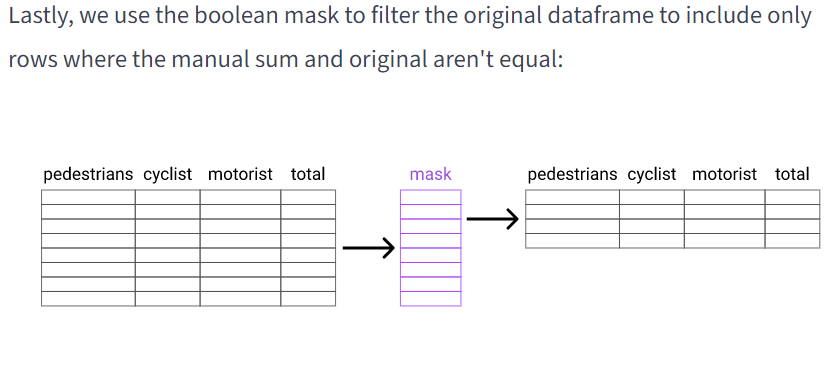

In [67]:
# Use killed_mask to filter the rows in killed. Assign the result to killed_non_eq.
killed_non_eq = killed[killed_mask]

killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


We can categorize these into two categories:

1. Five rows where the total_killed is not equal to the sum of the other columns because the total value is missing.
2. One row where the total_killed is less than the sum of the other columns.

### Verifying the Total Columns

In [68]:
killed_manual_sum.value_counts()

0    57814
1       50
dtype: int64

we'll learn to use the Series.mask() method. Series.mask() is useful when you want to replace certain values in a series based off a boolean mask. The syntax for the method is:

Series.mask(bool_mask, val_to_replace)

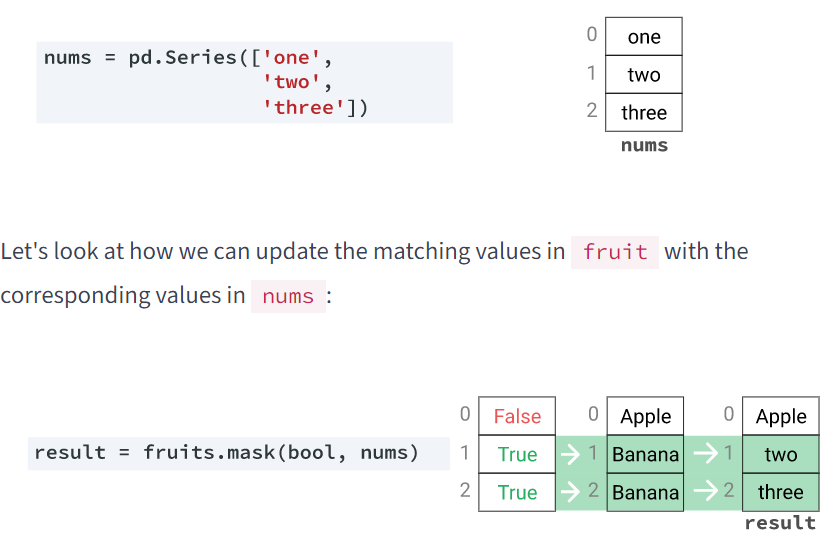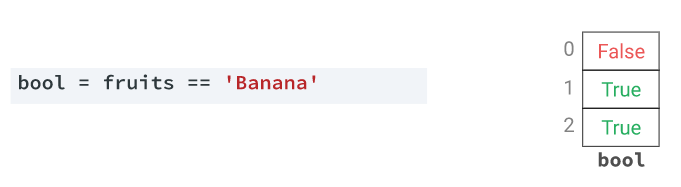

In [69]:
 import numpy as np

# fix the killed values
# Let's look at how we'd use this technique to update the values in the total_killed column. First, we'll replace all null values with the equivalent values from our killed_manual_sum series:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)

# we'll replace any values where the manual sum and the total column aren't equal with np.nan. This time we'll define the boolean series directly into Series.mask()
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

killed['total_killed'].value_counts(dropna=False)

0.0    57814
1.0       49
NaN        1
Name: total_killed, dtype: int64

In [70]:
# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] !=  injured_manual_sum, np.nan)

injured['total_injured'].value_counts(dropna=False)

0.0     46615
1.0      8590
2.0      1737
3.0       550
4.0       223
5.0        77
6.0        27
NaN        21
7.0        16
9.0         2
15.0        1
10.0        1
13.0        1
14.0        1
22.0        1
8.0         1
Name: total_injured, dtype: int64

### Assigning the Corrected Data Back to the Main DataFrame

Let's summarize the count of null values before and after our changes:

In [71]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}

pd.DataFrame(summary, index=['before','after'])

,injured,killed
before,1,5
after,21,1


For the total_killed column, the number of values has gone down from 5 to 1. For the total_injured column, the number of values has actually gone up — from 1 to 21. This might sound like we've done the opposite of what we set out to do, but what we've actually done is fill all the null values and identify values that have suspect data. This will make any analysis we do on this data more accurate in the long run.

Let's assign the values from the killed and injured dataframe back to the main mvc dataframe:

In [72]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

### Visualizing Missing Data with Plots

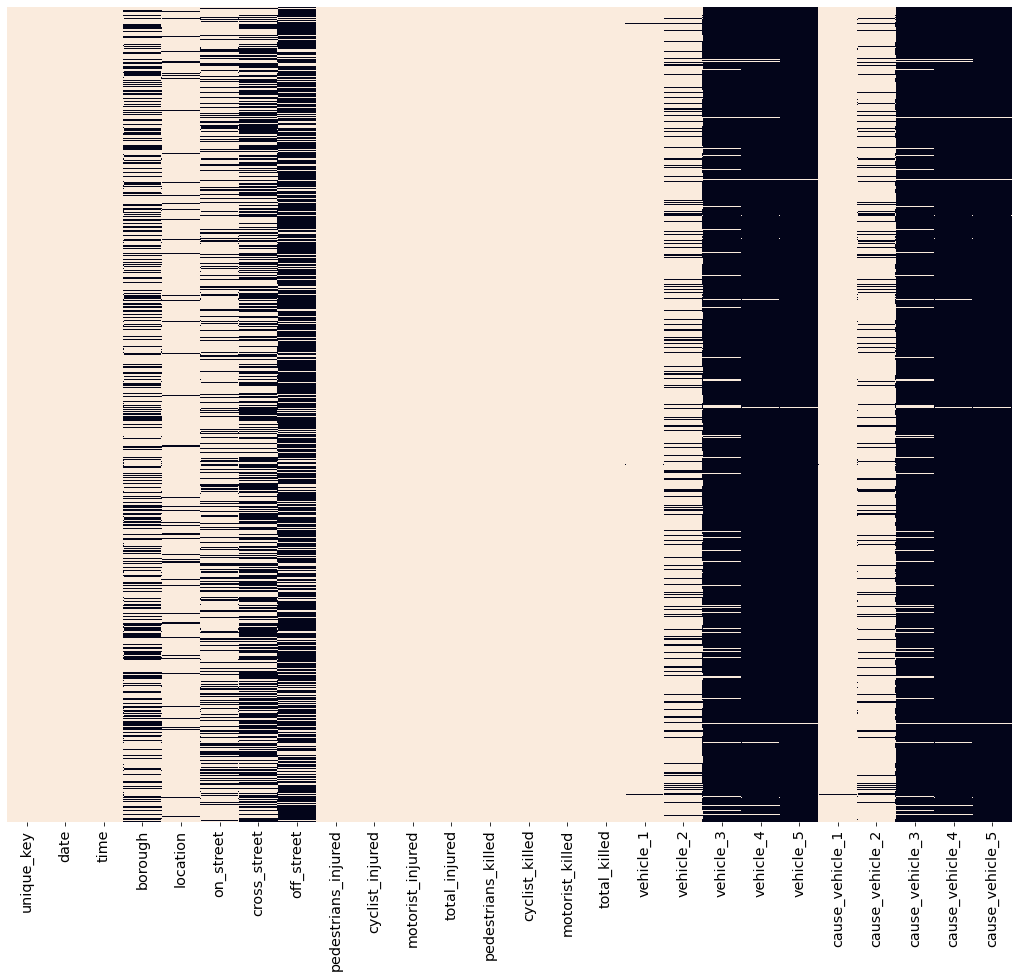

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

plot_null_matrix(mvc)

We can make some immediate interpretations about our dataframe:

* The first three columns have few to no missing values.
* The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.
* The next eight columns are the injury and killed columns we just cleaned, and only have a few missing values.
* The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

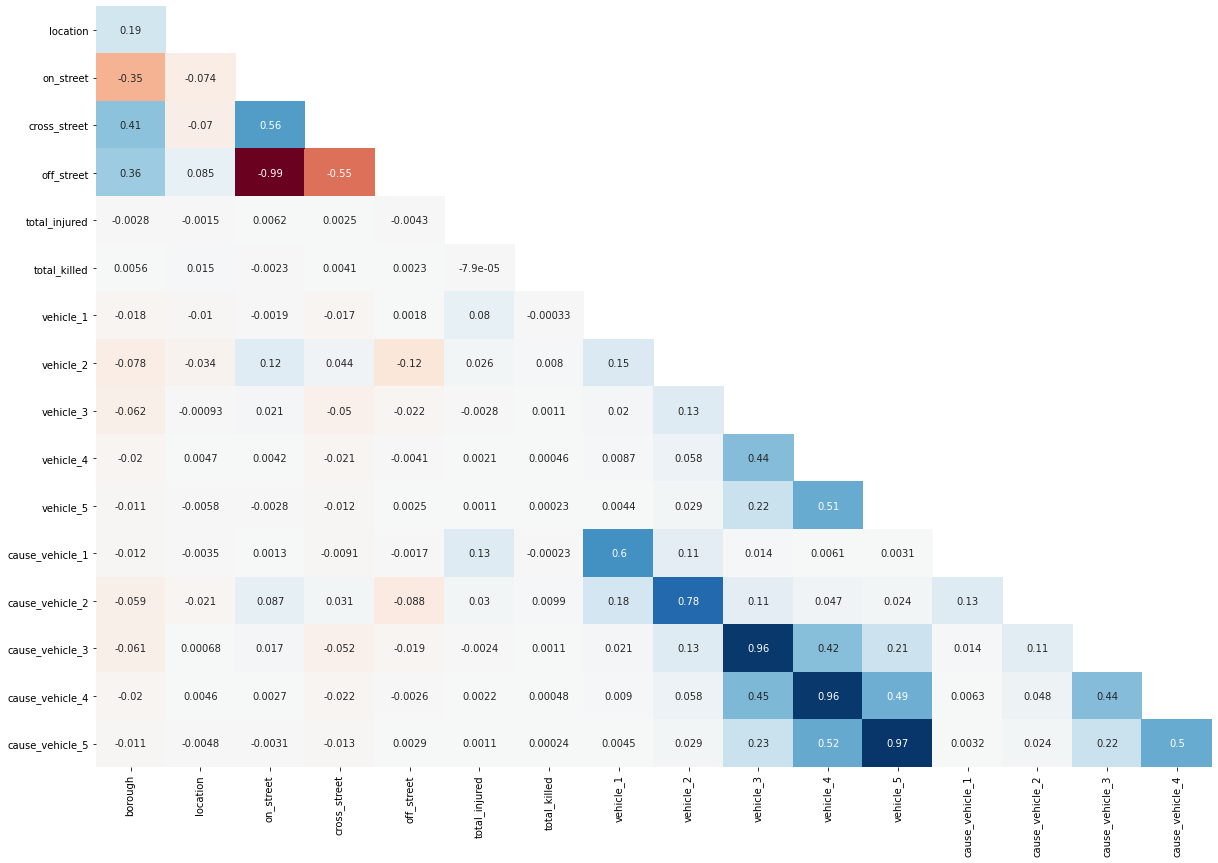

In [74]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()

missing_corr = missing_corr.iloc[1:, :-1]
mask = np.triu(np.ones_like(missing_corr), k=1)

plt.figure(figsize=(20,14))
ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False, 
                 cmap='RdBu', mask=mask, annot=True)
plt.show()

In our correlation plot:

* The "line of 1s" and the repeated values are removed so that it's not visually overwhelming.
* Values very close to 0, where there is little to no relationship, aren't labeled.
* Values close to 1are dark blue and values close to −1 are dark red — the depth of color represents the strength of the relationship.

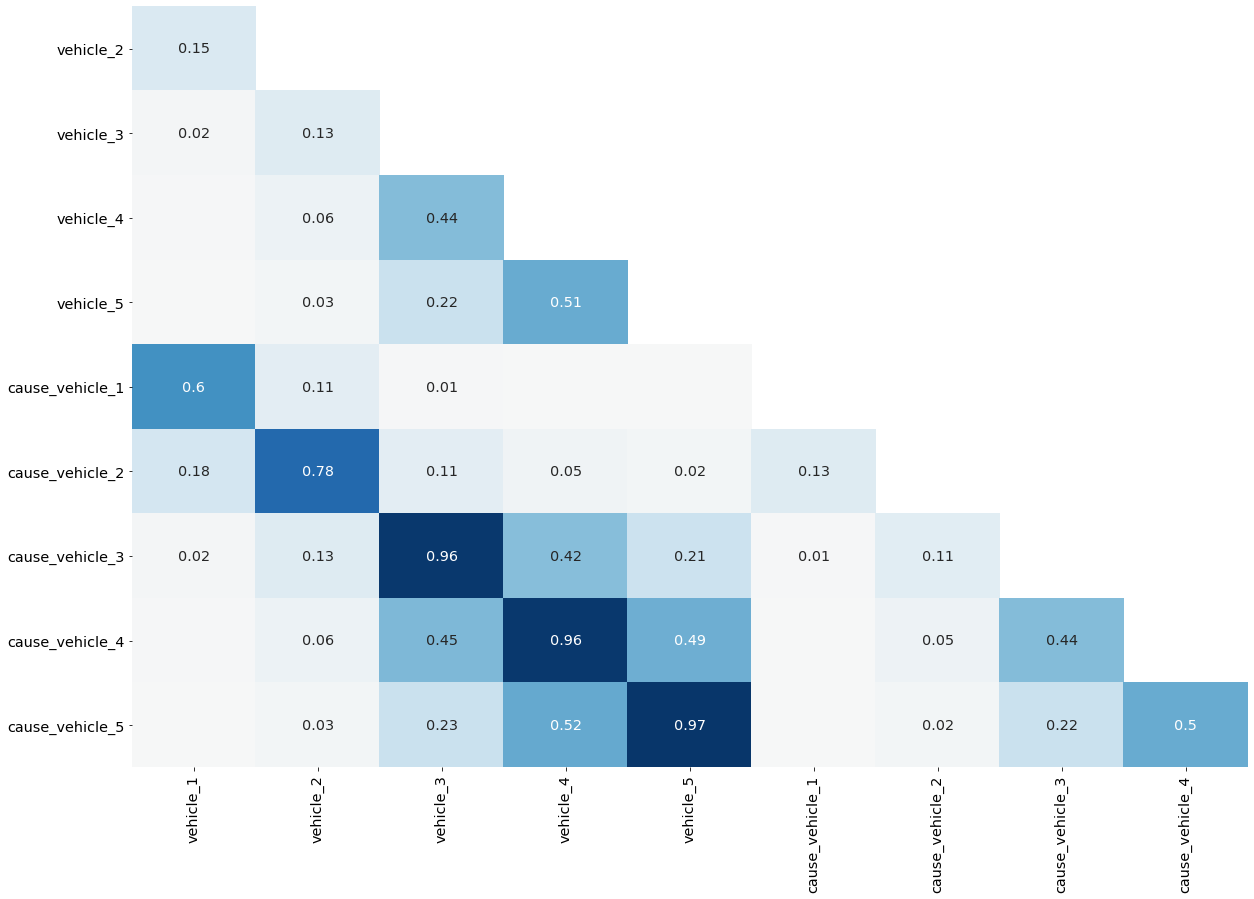

In [75]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    

veh_cols = [col for col in mvc.columns if 'vehicle' in col]

vehicle = mvc[veh_cols].copy()

plot_null_correlations(vehicle)

### Analyzing Correlations in Missing Data

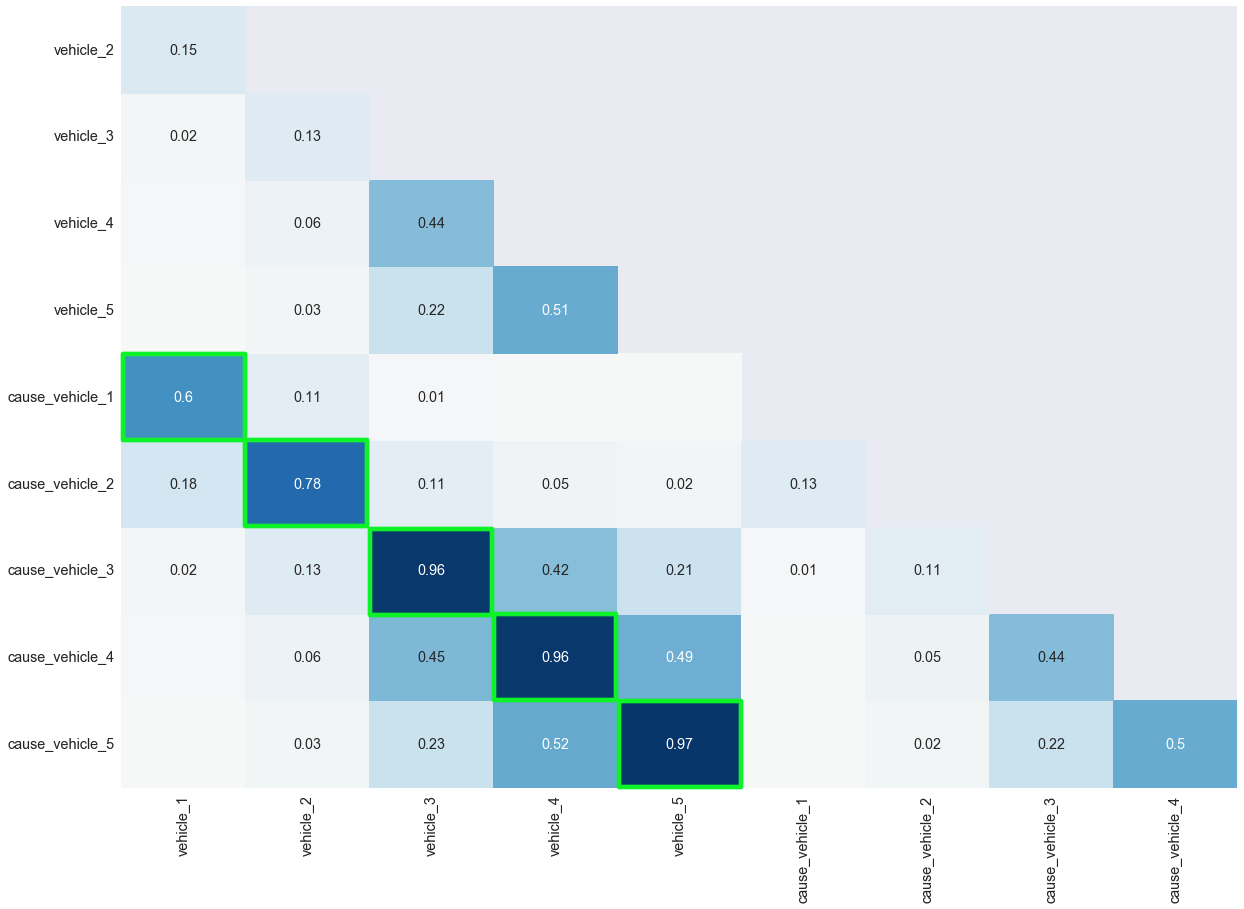

We outlined a diagonal strip of five squares in green that have a higher correlation than the rest. The pairs of column names that make up these five correlations are:

1. vehicle_1 and cause_vehicle_1
2. vehicle_2 and cause_vehicle_2
3. vehicle_3 and cause_vehicle_3
4. vehicle_4 and cause_vehicle_4
5. vehicle_5 and cause_vehicle_5

If you think about it, this makes sense. When a vehicle is in an accident, there is likely to be a cause, and vice-versa.

Let's explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:

* The number of values where the vehicle is missing when the cause is not missing.
* The number of values where the cause is missing when the vehicle is not missing.

In [76]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


### Finding the Most common Values Across Multiple Columns

In [77]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


To convert a dataframe to a single column of values, we use the **DataFrame.stack()** method, which stacks a dataframe object into a Series object.

In [78]:
cause_1d = cause.stack()
cause_1d.head()

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object

In [79]:
top10_causes = cause_1d.value_counts()[10]
top10_causes

1206

The most common non-null value for the cause columns is **Unspecified**, which presumably indicates that the officer reporting the collision was unable to determine the cause for that vehicle.

Let's use the same technique to identify the most common non-null value for the vehicle columns.

In [80]:
v_cols = [col for col in mvc.columns if col.startswith('vehicle')]
v_cols

['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5']

In [81]:
vehicle_1d = mvc[v_cols]
vehicle_1d

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN
2,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,Sedan,Sedan,NaN,NaN,NaN
4,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
...,...,...,...,...,...
57859,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
57860,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
57861,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
57862,Sedan,Tractor Truck Diesel,Station Wagon/Sport Utility Vehicle,NaN,NaN


In [82]:
top10_vehicles = vehicle.stack().value_counts()[:10]
top10_vehicles

Unspecified                            57481
Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
Driver Inattention/Distraction         17650
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Following Too Closely                   6567
Failure to Yield Right-of-Way           4566
Taxi                                    3482
Passing or Lane Usage Improper          3260
dtype: int64

### Filling Unknown Values with a Placeholder

In [83]:
col_labels = [col for col in mvc.columns if 'vehicle_' in col]

def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
print(summary_before)

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)

    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()

    mvc[v_col] = mvc[v_col].mask(v_missing_mask, 'Unspecified')
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, 'Unspecified')

summary_after = summarize_missing()
print(summary_after)

   vehicle_number  vehicle_missing  cause_missing
0               1              204             24
1               2             3793            223
2               3              242             24
3               4               50              3
4               5               10              0
   vehicle_number  vehicle_missing  cause_missing
0               1                0              0
1               2                0              0
2               3                0              0
3               4                0              0
4               5                0              0
